In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

housing_raw_data = pd.read_csv('D:/hv.se/AI/handson-ml2/datasets/housing/housing.csv')
housing_raw_data.drop("ocean_proximity", axis=1, inplace = True)
numerical_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])

housing_prepared_num = numerical_pipeline.fit_transform(housing_raw_data)

housing_raw_data_Without_NaN = pd.DataFrame(housing_prepared_num, columns=housing_raw_data.columns)
housing = housing_raw_data_Without_NaN.drop("median_house_value",axis=1)
housing_labels = housing_raw_data_Without_NaN["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(housing, housing_labels, test_size = 0.2, random_state=100)



In [2]:
param_grid_svr = {
    'C': [1, 10],
    'epsilon': [0.1, 0.5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

In [3]:
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}


In [4]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

In [5]:
def tune_model(model, param_grid, search_type='grid'):
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    else:
        search = RandomizedSearchCV(model, param_grid, n_iter=24, cv=5, scoring='neg_mean_squared_error', random_state=42)
    
    search.fit(x_train, y_train)
    return search

In [6]:
linear_params = {}


In [7]:
linear_model = LinearRegression()
linear_search_grid = tune_model(linear_model, linear_params, search_type='grid')

svm_model = SVR()
svm_search_grid = tune_model(svm_model, param_grid_svr, search_type='grid')
svm_search_random = tune_model(svm_model, param_grid_svr, search_type='random')

dt_model = DecisionTreeRegressor()
dt_search_grid = tune_model(dt_model, param_grid_dt, search_type='grid')
dt_search_random = tune_model(dt_model, param_grid_dt, search_type='random')

rf_model = RandomForestRegressor()
rf_search_grid = tune_model(rf_model, param_grid_rf, search_type='grid')
rf_search_random = tune_model(rf_model, param_grid_rf, search_type='random')

C:\Users\Akhil R\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=24. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [9]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

results = {
    'Linear Regression': (linear_search_grid, linear_search_grid.best_params_),
    'Decision Tree (Grid)': (dt_search_grid, dt_search_grid.best_params_),
    'Decision Tree (Random)': (dt_search_random, dt_search_random.best_params_),
    'Random Forest (Grid)': (rf_search_grid, rf_search_grid.best_params_),
    'Random Forest (Random)': (rf_search_random, rf_search_random.best_params_),
    'SVM (Grid)': (svm_search_grid, svm_search_grid.best_params_),
    'SVM (Random)': (svm_search_random, svm_search_random.best_params_)
}

for name, (model, params) in results.items():
    mse, r2 = evaluate_model(model.best_estimator_, x_test, y_test)
    print(f"{name}: Best Params: {params}, MSE: {mse:.4f}, R²: {r2:.4f}")

Linear Regression: Best Params: {}, MSE: 0.3471, R²: 0.6570
Decision Tree (Grid): Best Params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}, MSE: 0.3464, R²: 0.6577
Decision Tree (Random): Best Params: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}, MSE: 0.3566, R²: 0.6476
Random Forest (Grid): Best Params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}, MSE: 0.1760, R²: 0.8261
Random Forest (Random): Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}, MSE: 0.1769, R²: 0.8252
SVM (Grid): Best Params: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}, MSE: 0.2144, R²: 0.7881
SVM (Random): Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 10}, MSE: 0.2144, R²: 0.7881


In [15]:
evaluation_results = []

for name, (model, params) in results.items():
    mse, r2 = evaluate_model(model.best_estimator_, x_test, y_test)
    evaluation_results.append({
        'Model': name,
        'Best Params': params,
        'MSE': mse,
        'R²': r2
    })
results_df = pd.DataFrame(evaluation_results)


In [16]:


print(results_df.to_string(index=False))


                 Model                                                                                                   Best Params      MSE       R²
     Linear Regression                                                                                                            {} 0.347101 0.656981
  Decision Tree (Grid)                     {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10} 0.346398 0.657676
Decision Tree (Random)                      {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10} 0.356589 0.647605
  Random Forest (Grid)  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50} 0.175990 0.826080
Random Forest (Random) {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20} 0.176928 0.825153
            SVM (Grid)                                                  {'C': 10, 'epsilon': 0

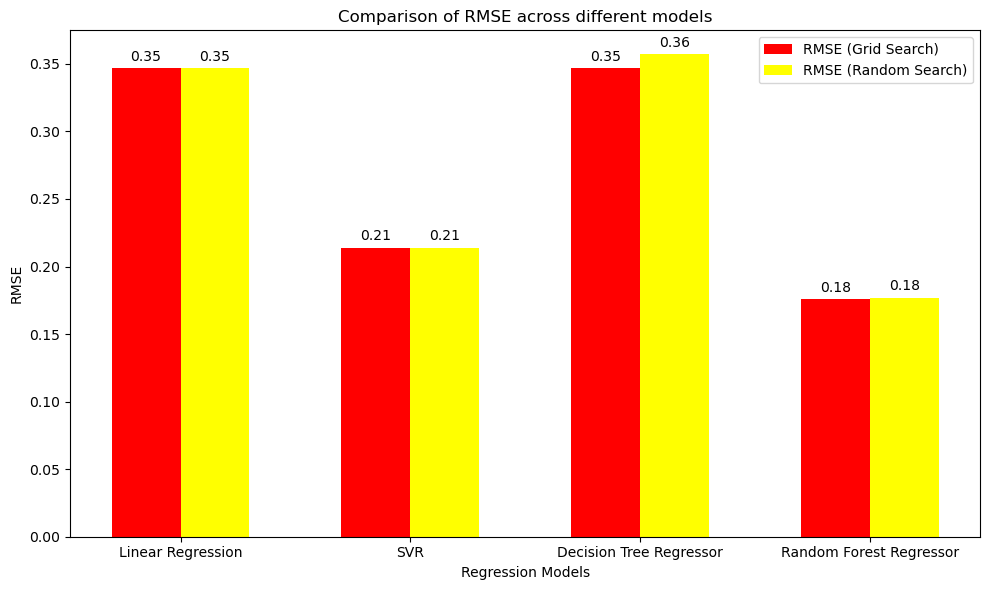

In [30]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Linear Regression', 'SVR', 'Decision Tree Regressor', 'Random Forest Regressor']

rmse_grid = [0.347, 0.214, 0.347, 0.176]
rmse_random = [0.347, 0.214, 0.357, 0.177]
bar_width = 0.3
x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(10,6))

bar1 = ax.bar(x - bar_width/2, rmse_grid, bar_width, label='RMSE (Grid Search)', color='red')
bar2 = ax.bar(x + bar_width/2, rmse_random, bar_width, label='RMSE (Random Search)', color='yellow')

ax.set_xlabel('Regression Models')
ax.set_ylabel('RMSE')
ax.set_title('Comparison of RMSE across different models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add values on top of the bars
def add_values(bar):
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bar1)
add_values(bar2)

# Show the plot
plt.tight_layout()
plt.show()


In [35]:
best_rf_model = RandomForestRegressor(
    max_depth=20,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=50
)
best_rf_model.fit(x_train, y_train)
y_pred_test = best_rf_model.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Test Set MSE: {mse_test}")



Test Set MSE: 0.17887699113961514
